In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("cleaned_realme.csv")

In [6]:
data.head(10)

,product name,price,ratings,features,page number,original_price,Discount,Review,price1,original_lprice,GB_list,Review-1,number_of_ratings,Ratings1,number_of_reviews,Colour,RAM,ROM
0,realme P3 Lite 5G Charger in the Box (Purple B...,"₹10,499",4.4,4 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...,1,"₹12,999",19% off,"5,420 Ratings & 229 Reviews",10499,12999,['8'],"5,420 Ratings",5,229 Reviews,229,Purple Blossom,4,4
1,"realme P3x 5G (Midnight Blue, 128 GB)","₹11,999",4.4,6 GB RAM | 128 GB ROM17.07 cm (6.72 inch) Full...,1,"₹16,999",29% off,"64,413 Ratings & 2,409 Reviews",11999,16999,['8'],"64,413 Ratings",64,"2,409 Reviews",2409,Midnight Blue,6,6
2,"realme P3x 5G (Midnight Blue, 128 GB)","₹12,999",4.4,8 GB RAM | 128 GB ROM17.07 cm (6.72 inch) Full...,1,"₹17,999",27% off,"21,314 Ratings & 880 Reviews",12999,17999,['8'],"21,314 Ratings",21,880 Reviews,880,Midnight Blue,8,8
3,realme P3 Lite 5G Charger in the Box (Midnight...,"₹11,499",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...,1,"₹13,999",17% off,"7,721 Ratings & 314 Reviews",11499,13999,['8'],"7,721 Ratings",7,314 Reviews,314,Midnight Lily,6,6
4,realme P3 Lite 5G Charger in the Box (Midnight...,"₹10,499",4.4,4 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...,1,"₹12,999",19% off,"5,420 Ratings & 229 Reviews",10499,12999,['8'],"5,420 Ratings",5,229 Reviews,229,Midnight Lily,4,4
5,"realme 15x 5G (Marine Blue, 256 GB)","₹20,499",4.3,8 GB RAM | 256 GB ROM | Expandable Upto 2 TB17...,1,"₹21,999",6% off,"2,198 Ratings & 159 Reviews",20499,21999,['6'],"2,198 Ratings",2,159 Reviews,159,Marine Blue,8,8
6,"realme Narzo 80 Lite 5G (Onyx Black, 128 GB)","₹10,973",4.3,6 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Disp...,1,"₹14,999",26% off,"4,003 Ratings & 156 Reviews",10973,14999,['8'],"4,003 Ratings",4,156 Reviews,156,Onyx Black,6,6
7,"realme P3x 5G (Stellar Pink, 128 GB)","₹11,999",4.4,6 GB RAM | 128 GB ROM17.07 cm (6.72 inch) Full...,1,"₹16,999",29% off,"64,413 Ratings & 2,409 Reviews",11999,16999,['8'],"64,413 Ratings",64,"2,409 Reviews",2409,Stellar Pink,6,6
8,"realme Narzo 80 Lite 5G (Onyx Black, 128 GB)","₹10,762",4.4,4 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Disp...,1,"₹13,999",23% off,488 Ratings & 22 Reviews,10762,13999,['8'],488 Ratings,488,22 Reviews,22,Onyx Black,4,4
9,"realme P4 5G (Steel Grey, 256 GB)","₹21,499",4.4,8 GB RAM | 256 GB ROM17.2 cm (6.77 inch) Displ...,1,"₹23,999",10% off,"10,977 Ratings & 779 Reviews",21499,23999,['6'],"10,977 Ratings",10,779 Reviews,779,Steel Grey,8,8


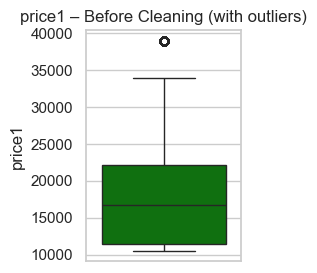

In [46]:
col = "price1"# numeric column for outliers

# 2. Boxplot BEFORE cleaning (see outliers)
plt.figure(figsize=(2,3))
sns.boxplot(y=data[col], color=("Green"))         # 4C72B0
plt.title(f"{col} – Before Cleaning (with outliers)")
plt.ylabel(col)
plt.show()

In [34]:
# 3. Detect & remove outliers with IQR
Q1  = data[col].quantile(0.25)
Q3  = data[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data_clean = data[(data[col] >= lower) & (data[col] <= upper)]
print("Before:", data.shape[0], "rows")
print("After :", data_clean.shape[0], "rows")

Before: 9768 rows
After : 9361 rows


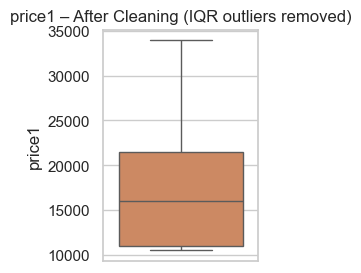

In [47]:
# 4. Boxplot AFTER cleaning (no outliers)
plt.figure(figsize=(2,3))
sns.boxplot(y=data_clean[col], color="#DD8452")
plt.title(f"{col} – After Cleaning (IQR outliers removed)")
plt.ylabel(col)
plt.show()

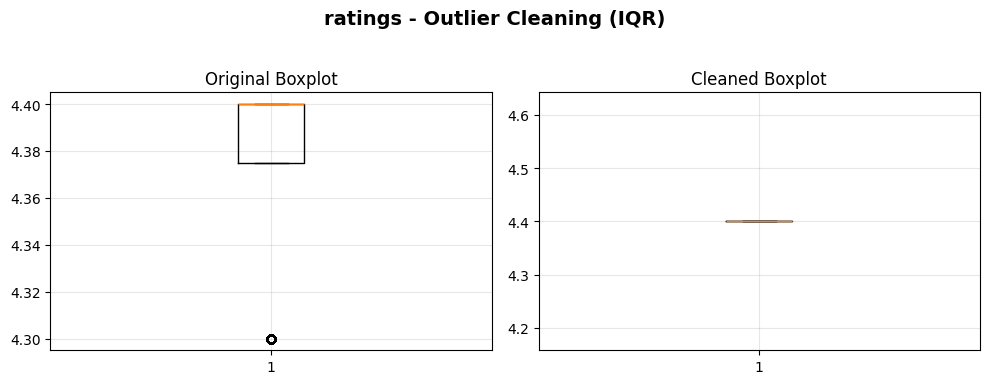

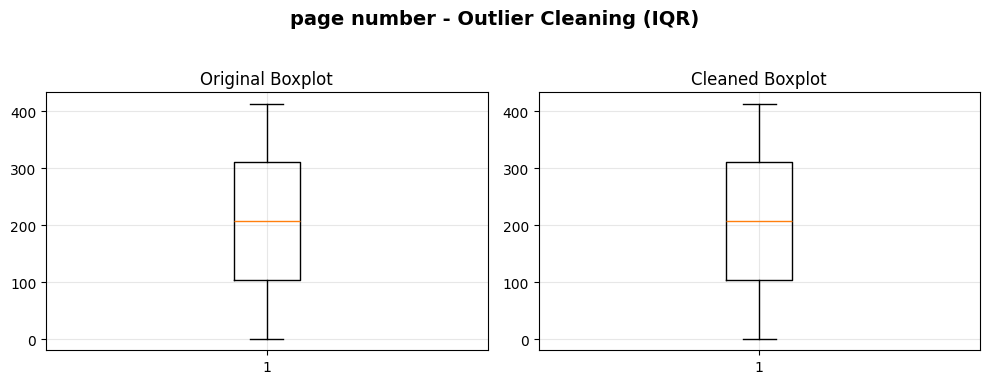

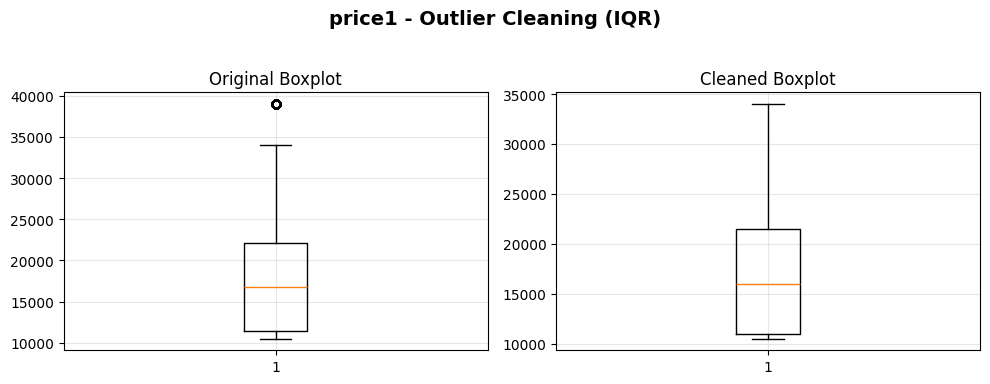

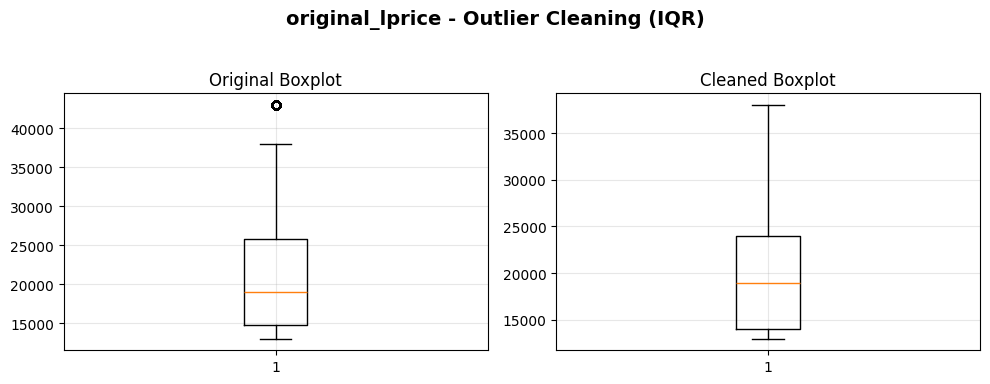

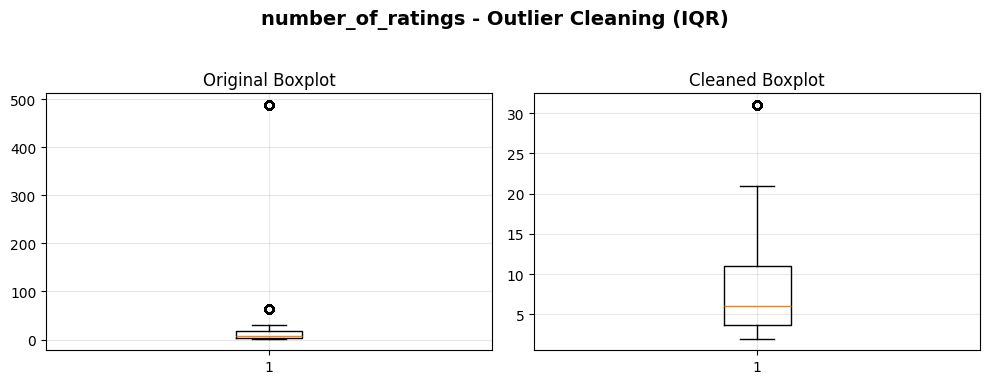

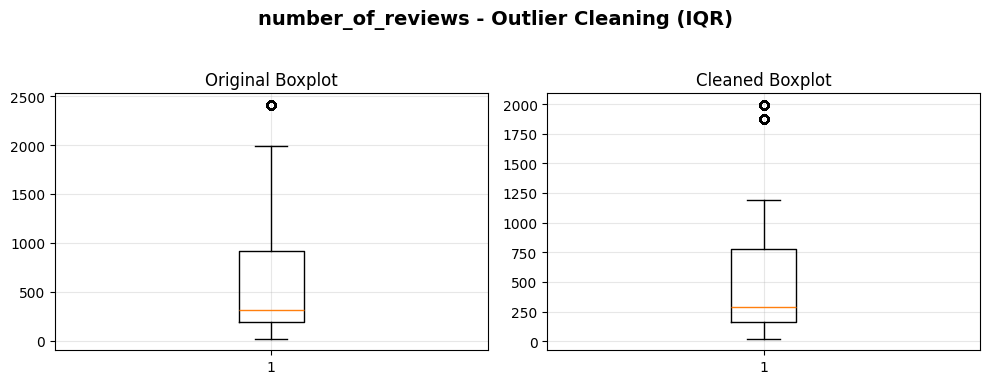

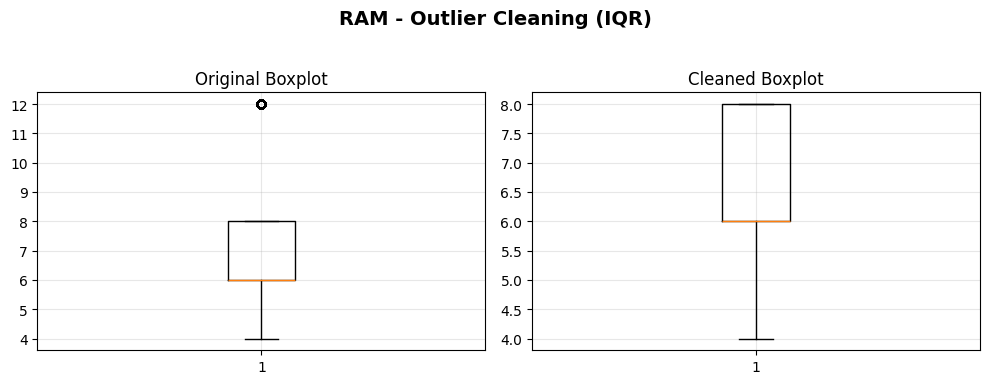

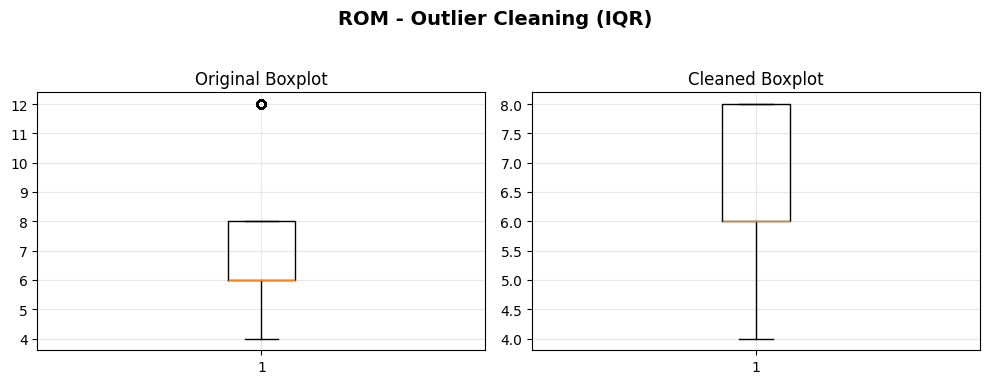

In [5]:
# 2. IQR outlier remover
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

num_cols = data.select_dtypes(include="number").columns

for col in num_cols:
    original = data[col].dropna()
    cleaned_col = remove_outliers(original)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{col} - Outlier Cleaning (IQR)', fontsize=14, fontweight='bold')

    axes[0].boxplot(original.values)
    axes[0].set_title('Original Boxplot')

    axes[1].boxplot(cleaned_col.values)
    axes[1].set_title('Cleaned Boxplot')

    for ax in axes.flat:
        ax.grid(alpha=0.3)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# ✅ outliers are cleaned


# How are prices and engagement distributed?

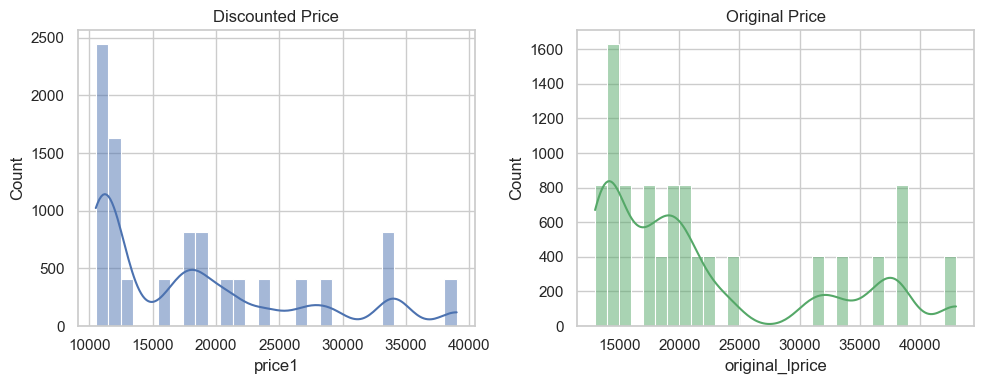

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


sns.histplot(data["price1"], kde=True, ax=axes[0], color="#4C72B0")
axes[0].set_title("Discounted Price")

sns.histplot(data["original_lprice"], kde=True, ax=axes[1], color="#55A868")
axes[1].set_title("Original Price")


plt.tight_layout()
plt.show()


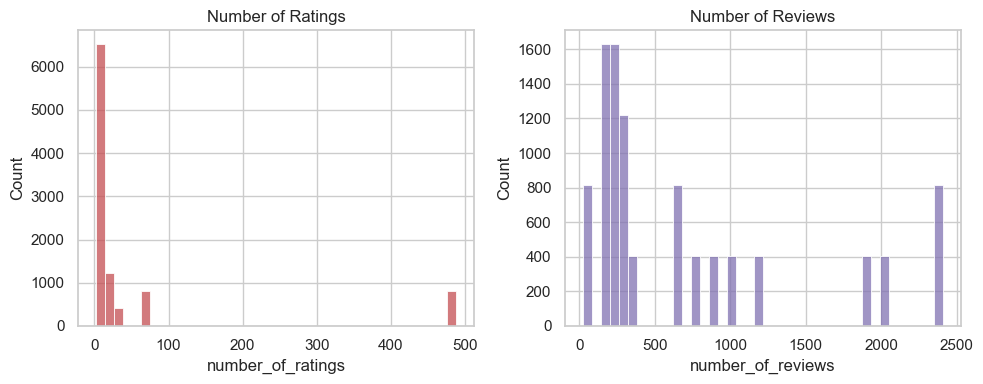

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data["number_of_ratings"], bins=40, ax=axes[0], color="#C44E52")
axes[0].set_title("Number of Ratings")

sns.histplot(data["number_of_reviews"], bins=40, ax=axes[1], color="#8172B2")
axes[1].set_title("Number of Reviews")

plt.tight_layout()
plt.show()


### 📌Price is right‑skewed (some premium phones), engagement is also skewed with few very popular models.

# Which specs (RAM/ROM) are most common?

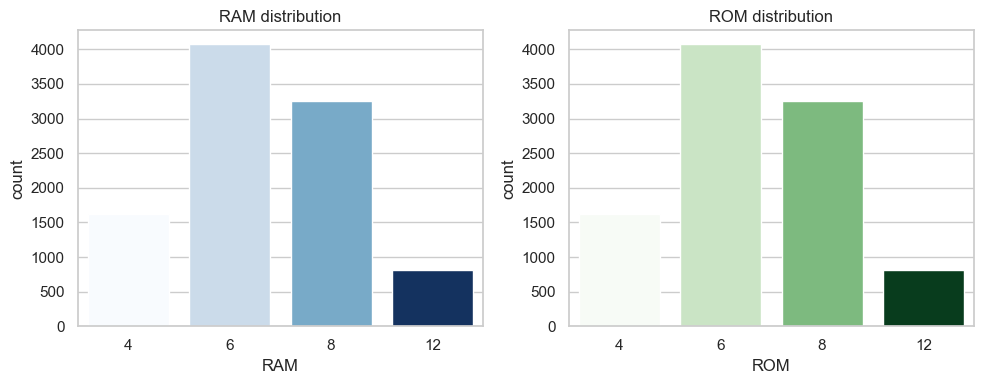

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x="RAM", hue="RAM", data=data, ax=axes[0], palette="Blues", legend=False)           # use color, not palette                                                                                        
axes[0].set_title("RAM distribution")

sns.countplot(x="ROM", hue = "ROM",data = data, ax = axes[1],palette = "Greens",legend = False)
axes[1].set_title("ROM distribution")

plt.tight_layout()
plt.show()


### 📌 6 GB and 8 GB RAM with 128 GB ROM dominate the catalogue; 4 GB and 12 GB RAM, and 256 GB ROM, appear much less often.

# How does price vary by RAM and ROM?

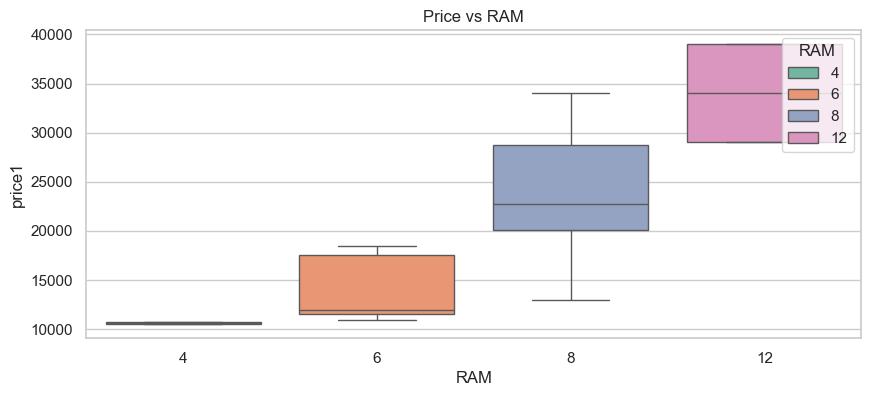

In [99]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="RAM", y="price1", hue="RAM", data=data,
            palette="Set2", dodge=False)   # legend can be removed if you want
plt.title("Price vs RAM")
plt.legend(title="RAM", loc="upper right")
plt.show()


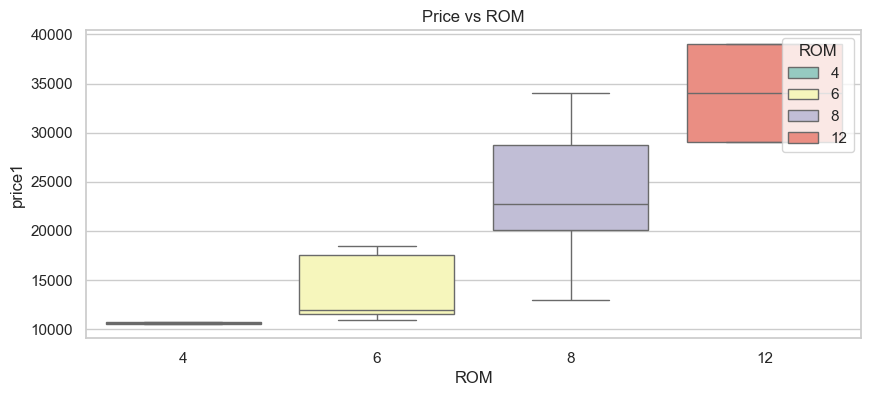

In [102]:
plt.figure(figsize=(10,4))
sns.boxplot(x="ROM", y="price1", data=data, hue="ROM", palette="Set3", dodge = False)
plt.title("Price vs ROM")
plt.legend(title="ROM",loc="upper right")
plt.show()

### 📌Shows how much extra customers pay for higher RAM/ROM tiers; good to discuss up‑selling strategyMedian price clearly increases as RAM goes from 4 → 6 → 8 → 12 GB and when ROM goes from 128 → 256 GB, with only small overlap between tiers.

# Are higher‑priced phones actually rated better?

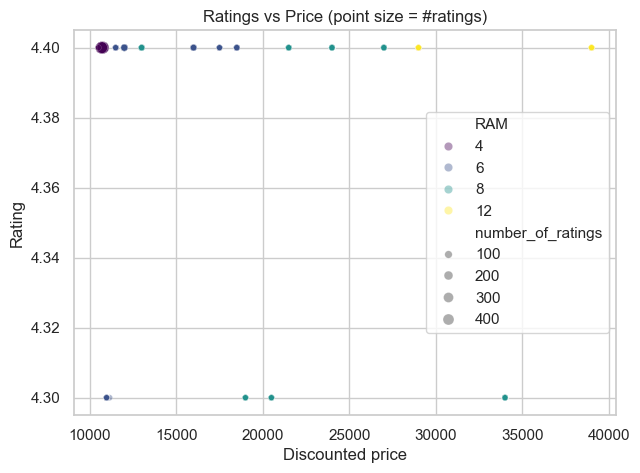

In [104]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="price1", y="ratings",
                size="number_of_ratings",
                hue="RAM",
                data=data, alpha=0.4, palette="viridis")
plt.title("Ratings vs Price (point size = #ratings)")
plt.xlabel("Discounted price")
plt.ylabel("Rating")
plt.show()


### 📌Often ratings stay around 4.3–4.4 across price bands, so premium price doesn’t guarantee higher satisfaction; big bubbles show best‑selling models cluster in certain price ranges.No; phones across all price levels sit around 4.3–4.4 stars, so expensive models are not noticeably better rated than cheaper ones.

# Which colours and variants are most popular?

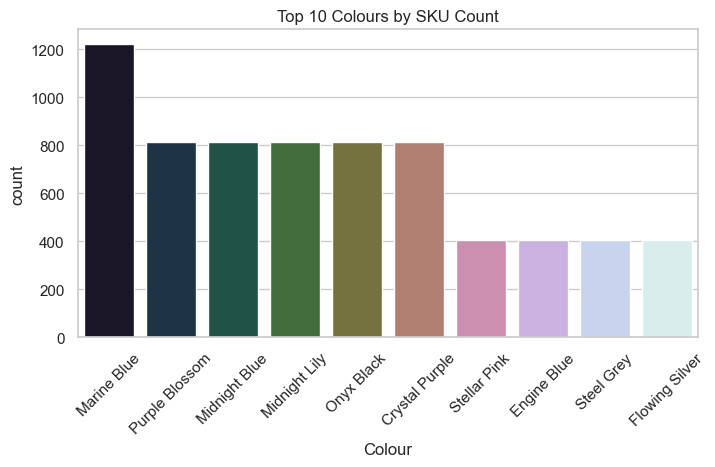

In [108]:
top_colours = top_colours.copy()
top_colours["Colour_cat"] = top_colours["Colour"]  # same values, used only for hue

plt.figure(figsize=(8, 4))
sns.barplot(x="Colour", y="count",
            hue="Colour_cat", dodge=False,
            data=top_colours, palette="cubehelix", legend=False)
plt.title("Top 10 Colours by SKU Count")
plt.xticks(rotation=45)
plt.show()


In [109]:
# Average price by colour
avg_price_colour = (data.groupby("Colour")["price1"]
                      .agg(["count","mean"])
                      .sort_values("mean"))
display(avg_price_colour.head(5))
display(avg_price_colour.tail(5))


,count,mean
Colour,,
Crystal Purple,814,10831.701474
Onyx Black,814,10867.716216
Midnight Lily,814,10999.000000
Purple Blossom,814,10999.000000
Stellar Pink,407,11999.000000


,count,mean
Colour,,
Midnight Ivy,407,26999.0
Dark Oak Wood,407,28999.0
Silk Purple,407,33999.0
Velvet Green,407,33999.0
Flowing Silver,407,38999.0


### 📌You can say which colours dominate the catalogue and whether any colour consistently commands higher/lower prices.Colours like Crystal Purple, Onyx Black, Midnight Lily, and Purple Blossom have the highest counts and are tied to mid‑range prices, while colours like Midnight Ivy, Dark Oak Wood, Silk Purple, Velvet Green, and Flowing Silver are fewer and linked to much higher prices

# What are the correlations and key drivers?

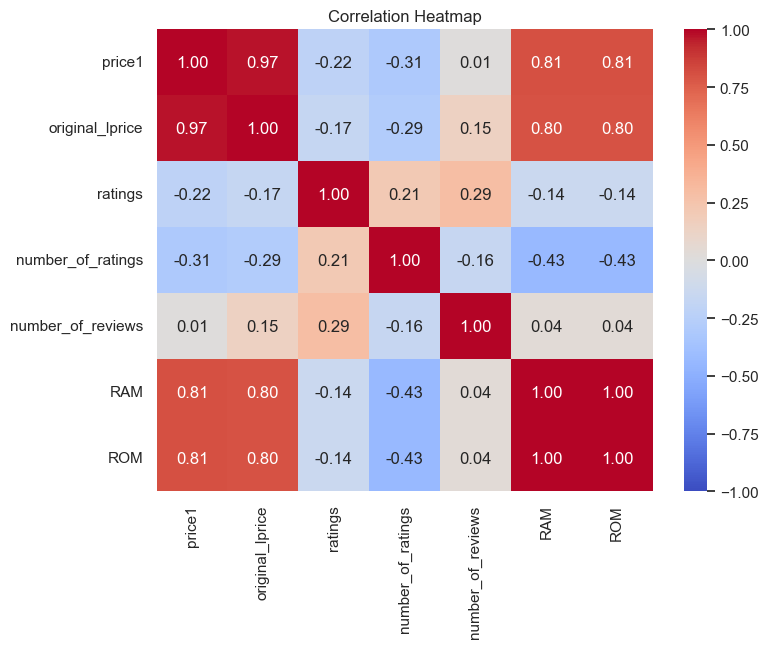

In [111]:
num_cols = ["price1","original_lprice","ratings",
            "number_of_ratings","number_of_reviews","RAM","ROM"]

plt.figure(figsize=(8,6))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


### 📌Ratings and review counts are strongly correlated with each other, prices correlate strongly with original prices and moderately with RAM/ROM, but the rating score itself has only weak correlation with price or engagement.

# What discount do customers actually get?

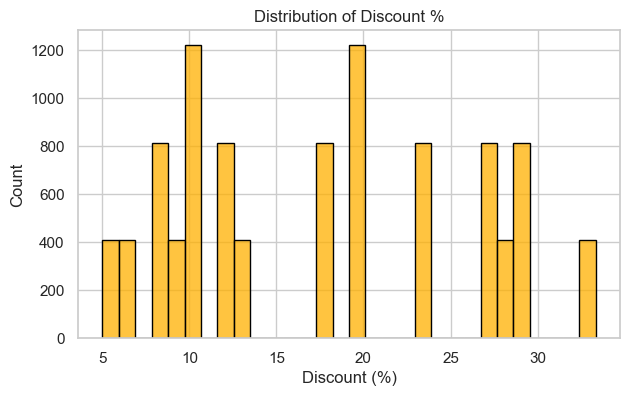

mean    17.494782
min      5.000250
max     33.334259
Name: discount_pct, dtype: float64


In [115]:
data["discount_pct"] = (1 - data["price1"] / data["original_lprice"]) * 100

plt.figure(figsize=(7,4))
sns.histplot(data["discount_pct"], bins=30, color="#FFB000", edgecolor="black")
plt.title("Distribution of Discount %")
plt.xlabel("Discount (%)")
plt.show()

print(data["discount_pct"].describe()[["mean","min","max"]])


### 📌Talk about typical discount range and extreme offers.Calculated discount percentages cluster in a moderate range, with most phones getting similar mid‑level discounts and only a few receiving very deep cuts.

# Which RAM–ROM combos are most common?

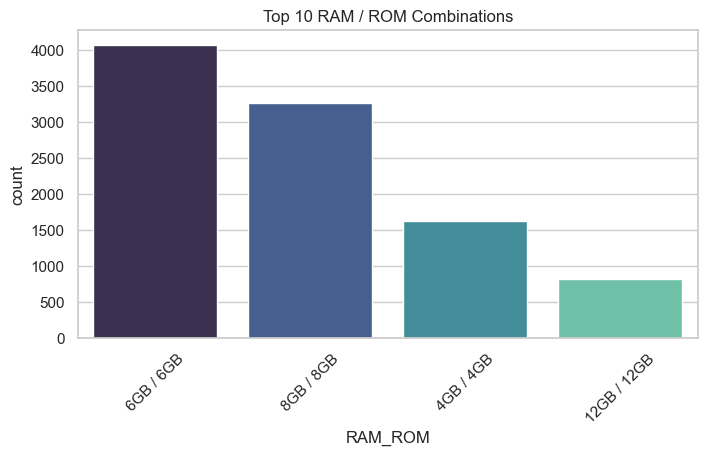

In [117]:
plt.figure(figsize=(8,4))
sns.barplot(data=combo_counts, x="RAM_ROM", y="count", hue="RAM_ROM", palette="mako", legend=False)
plt.title("Top 10 RAM / ROM Combinations")
plt.xticks(rotation=45)
plt.show()


### 📌Easy slide showing most offered hardware configurations.The 6 GB / 128 GB and 8 GB / 128 GB combinations appear most frequently, forming the core of the portfolio; 4 GB / 128 GB and 8–12 GB / 256 GB are niche segments.​

# Do higher discounts boost ratings count?

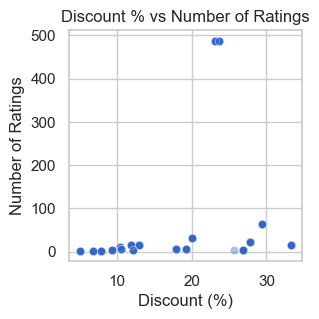

In [122]:
plt.figure(figsize=(3,3))
sns.scatterplot(x="discount_pct", y="number_of_ratings",
                data=data, alpha=0.4, color="#3366CC")
plt.title("Discount % vs Number of Ratings")
plt.xlabel("Discount (%)")
plt.ylabel("Number of Ratings")
plt.show()


### 📌If the pattern is upward, you can say deeper discounts are associated with more buyers/ratingsThe scatter between discount % and number_of_ratings shows at best a mild positive pattern: heavily discounted phones sometimes attract more ratings, but discount alone does not fully explain engagement.

# Which models balance price and popularity best?

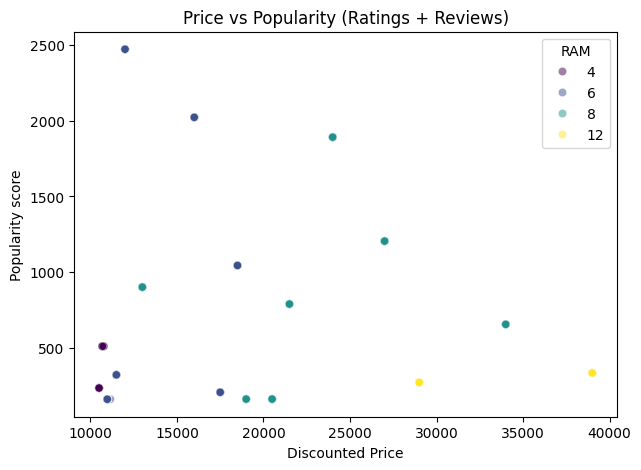

In [5]:
# create a simple popularity score
data["popularity"] = (data["number_of_ratings"] + data["number_of_reviews"]).astype(float)

plt.figure(figsize=(7,5))
sns.scatterplot(x="price1", y="popularity",
                hue="RAM", data=data, alpha=0.5, palette="viridis")
plt.title("Price vs Popularity (Ratings + Reviews)")
plt.xlabel("Discounted Price")
plt.ylabel("Popularity score")
plt.show()


### 📌Identify “value for money” cluster – moderate price, high popularity.On the price vs popularity plot, the most attractive phones cluster in the mid‑price range with high ratings/reviews counts, indicating strong demand at affordable prices rather than at extreme low or high prices.

# Are ratings different across colours?

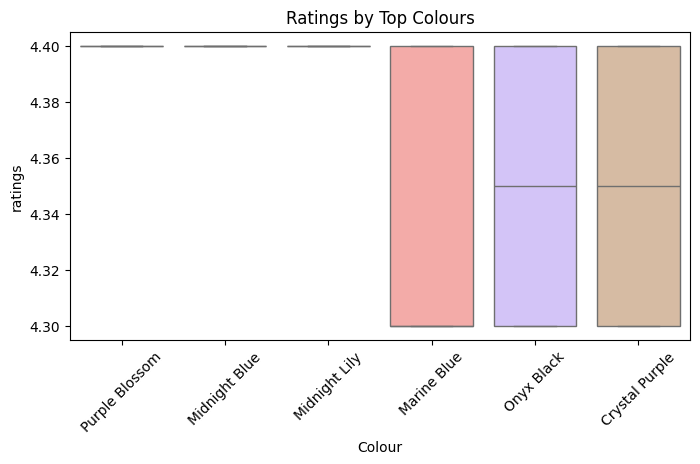

In [7]:
top_cols = data["Colour"].value_counts().head(6).index
temp = data[data["Colour"].isin(top_cols)]

plt.figure(figsize=(8,4))
sns.boxplot(
    x="Colour",
    y="ratings",
    data=temp,
    hue="Colour",      # map colors through hue
    palette="pastel",
    legend=False       # avoid duplicate legend
)

plt.title("Ratings by Top Colours")
plt.xticks(rotation=45)
plt.show()


### 📌Boxplots of ratings by colour stay tight around 4.3–4.4 for all major colours, so colour influences price and positioning more than customer satisfaction scores.

🧠What does the dataset contain?
* The dataset has around 9.7k rows and 18 columns covering product name, Colour, RAM, ROM, selling price, original price, discount, ratings, and review counts for Realme smartphones

@ How are ratings distributed across products?
* Ratings are tightly concentrated around 4.3–4.4, with almost no phones below 4.0, so nearly all products look “good” on the rating scale.

@ What does the price distribution look like?
* Discounted prices are heavily concentrated in the ₹10k–₹20k band, with a thinner tail of higher‑priced models above ~₹25k–₹35k and beyond.

@ Which RAM configurations are most common?
*  6 GB and 8 GB RAM variants dominate the catalogue, while 4 GB and 12 GB RAM appear much less frequently.

@ What about ROM configurations?
* 128 GB is the standard ROM size across most SKUs, with 256 GB appearing mainly in higher‑priced devices.

@ Does price increase with RAM?
* Yes, boxplots show a clear step‑up in median and spread of price as RAM increases from 4 → 6 → 8 → 12 GB

@ Does price increase with ROM?
* 128 GB is the standard ROM size across most SKUs, with 256 GB appearing mainly in higher‑priced devices.

@ Which colours are most common and in which price band?
* Colours like Crystal Purple, Onyx Black, Midnight Lily, and Purple Blossom have high counts (814 each) with mean prices around ₹10.8k–₹11k, while colours like Midnight Ivy, Dark Oak Wood, Silk Purple, Velvet Green, and Flowing Silver have fewer SKUs (407 each) with mean prices from ~₹27k up to ~₹39k.

@ How are engagement metrics (ratings and reviews counts) distributed?
*  Both number_of_ratings and number_of_reviews are strongly right‑skewed: many products have modest engagement, but a small set has extremely high counts.

@ How strongly are engagement metrics related to each other and to ratings?
* number_of_ratings and number_of_reviews are strongly positively correlated, but correlation between star rating and price is weak, and between star rating and engagement is also limited.

# 🔍INSIGHTS

* The catalogue is dominated by mid‑range devices: most phones sell between ₹10k–₹20k with a few premium models above ₹25k–₹35k.
* 6 GB / 8 GB RAM and 128 GB ROM are the standard configurations; other RAM/ROM options are niche and mainly used for higher‑end variants.
* Each step‑up in RAM or ROM clearly increases price, showing a clean, planned price ladder rather than random pricing.
* Ratings are almost flat (around 4.3–4.4) across all models, so they do not explain why some phones are more expensive or more popular.
* A few colours (Crystal Purple, Onyx Black, Midnight Lily, Purple Blossom) are tied to budget / mid‑range prices, while premium colours (Midnight Ivy, Dark Oak Wood, Velvet Green, etc.) are used mainly for high‑priced models.
* Engagement is highly concentrated: only a small set of phones gets very high ratings and review counts; most models see moderate activity.
* Correlations show that price is driven by list price and memory specs, and popularity is captured by ratings + reviews, while the star rating itself has little influence on either.

# 🏁conclusion

* Realme runs a clear product ladder: each step‑up in RAM or ROM gives a predictable jump in price instead of random pricing
* 6–8 GB RAM with 128 GB ROM dominates the catalogue, proving the brand is laser‑focused on the mid‑range value segment.
* Ratings stay almost flat around 4.3–4.4 for all models, so customer satisfaction is uniformly high and price is not buying better ratings.
* Colour is used as a pricing signal: common colours sit around ₹11k, while rare finishes like Midnight Ivy or Dark Oak Wood jump to ₹27k–₹39k.